# Loading CSV

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'surveys_cleaned.csv'
surveys_cleaned = pd.read_csv(cleaned_file_path) 

# Basic Statistics

In [8]:
# Create the dictionaries for gender and age mappings

gender_map = {
    1: 'Male',
    2: 'Female',
    3: 'Other',
    4: 'Prefer not to say'
}

age_map = {
    1: '0 - 12',
    2: '13 - 17',
    3: '18 - 25',
    4: '26 - 35',
    5: '36 - 45',
    6: '46 - 55',
    7: '56 - 64',
    8: '65+'
}

C:\Users\jacob\AppData\Local\Temp\ipykernel_16796\3514319391.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(video1_categories.index, rotation=45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_16796\3514319391.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(video2_categories.index, rotation=45)


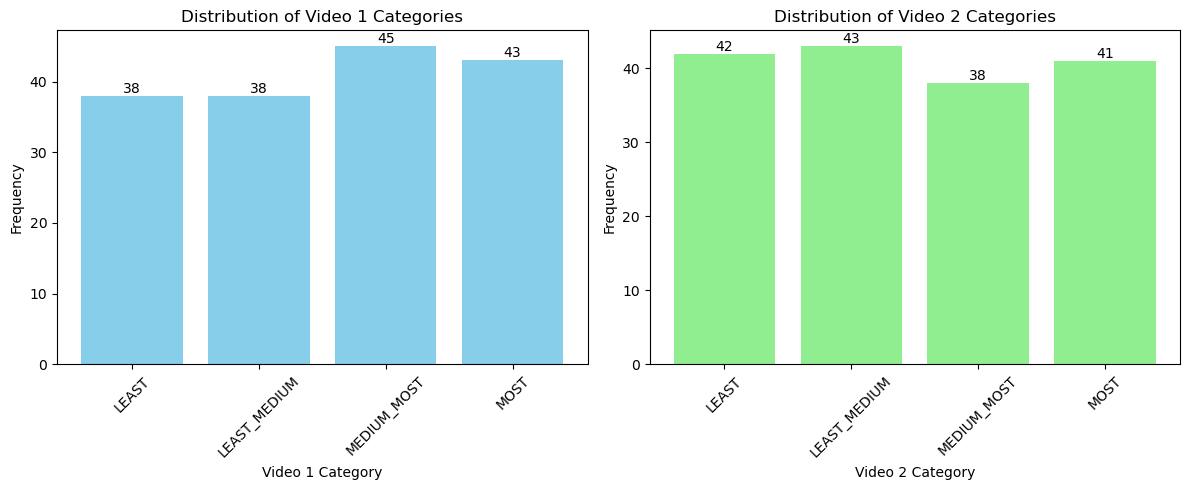

In [9]:
# Separate the video categories for Video1 and Video2
video1_categories = surveys_cleaned['Video1'].value_counts().sort_index()
video2_categories = surveys_cleaned['Video2'].value_counts().sort_index()

# Define figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Video1 categories
axes[0].bar(video1_categories.index, video1_categories.values, color='skyblue')
axes[0].set_xlabel('Video 1 Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Video 1 Categories')
axes[0].set_xticklabels(video1_categories.index, rotation=45)

# Add the amounts on top of the bars for Video1
for bar in axes[0].patches:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

# Plot Video2 categories
axes[1].bar(video2_categories.index, video2_categories.values, color='lightgreen')
axes[1].set_xlabel('Video 2 Category')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Video 2 Categories')
axes[1].set_xticklabels(video2_categories.index, rotation=45)

# Add the amounts on top of the bars for Video2
for bar in axes[1].patches:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

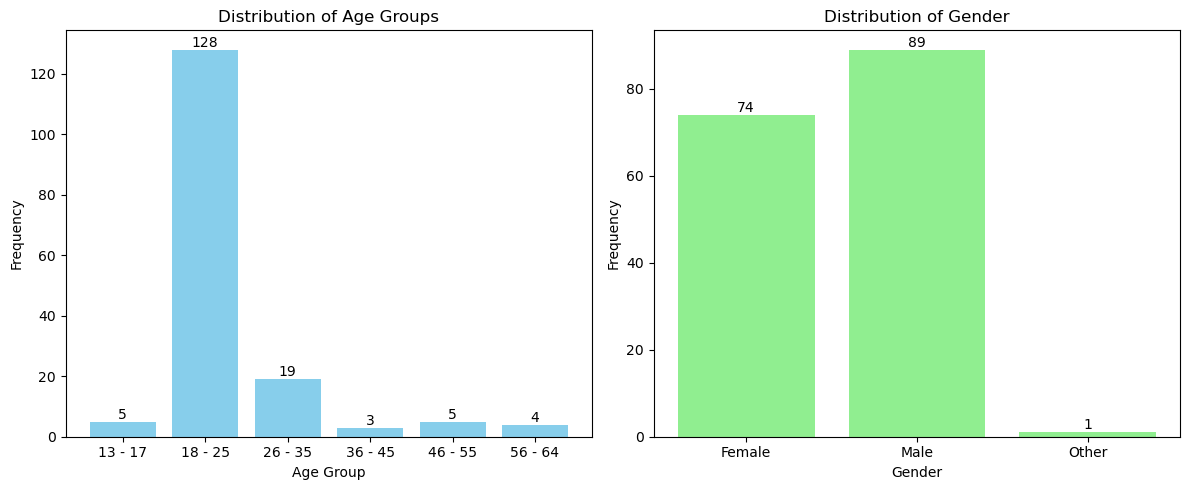

In [10]:
import matplotlib.pyplot as plt

# Map gender and age codes to their respective categories in the original cleaned data
surveys_cleaned['SexCategory'] = surveys_cleaned['Sex'].map(gender_map)
surveys_cleaned['AgeCategory'] = surveys_cleaned['Age'].map(age_map)

# Create a single plot with two subplots side by side for Age Groups and Gender

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the distribution of age groups
age_distribution = surveys_cleaned['AgeCategory'].value_counts().sort_index()
bars = axes[0].bar(age_distribution.index, age_distribution.values, color='skyblue')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age Groups')

# Add the amounts on top of the bars for Age Groups
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom')

# Plot the distribution of gender
gender_distribution = surveys_cleaned['SexCategory'].value_counts().sort_index()
bars = axes[1].bar(gender_distribution.index, gender_distribution.values, color='lightgreen')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Gender')

# Add the amounts on top of the bars for Gender
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


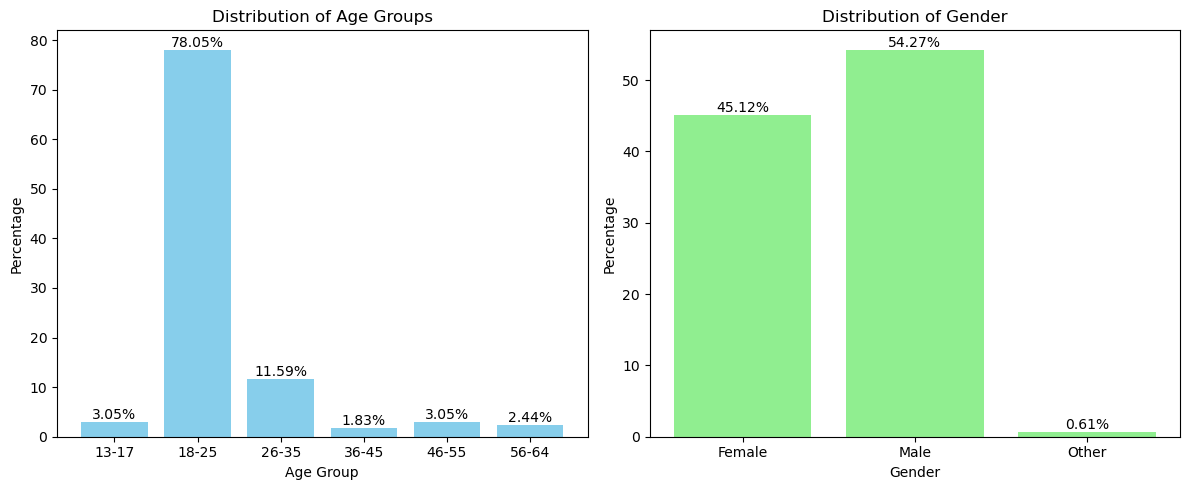

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Define gender and age mappings
gender_map = {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
age_map = {1: '0-12', 2: '13-17', 3: '18-25', 4: '26-35', 5: '36-45', 6: '46-55', 7: '56-64', 8: '65+'}

# Map gender and age codes to their respective categories
surveys_cleaned['SexCategory'] = surveys_cleaned['Sex'].map(gender_map)
surveys_cleaned['AgeCategory'] = surveys_cleaned['Age'].map(age_map)

# Create a single plot with two subplots side by side for Age Groups and Gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the distribution of age groups as percentages
age_distribution = surveys_cleaned['AgeCategory'].value_counts(normalize=True).sort_index() * 100
bars = axes[0].bar(age_distribution.index, age_distribution.values, color='skyblue')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Distribution of Age Groups')

# Add the percentages on top of the bars for Age Groups
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Plot the distribution of gender as percentages
gender_distribution = surveys_cleaned['SexCategory'].value_counts(normalize=True).sort_index() * 100
bars = axes[1].bar(gender_distribution.index, gender_distribution.values, color='lightgreen')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Distribution of Gender')

# Add the percentages on top of the bars for Gender
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Analysis 

In [23]:
# Reshape the DataFrame to have one row per video watched
video2_columns = ['Video2 Ad Likability', 'Video2 ID Questions_1', 'Video2 ID Questions_2', 'Video2 ID Questions_3', 'Video2 ID Questions_4']
video1_columns = ['Video1 Ad likability', 'Video1 ID Questions _1', 'Video1 ID Questions _2', 'Video1 ID Questions _3', 'Video1 ID Questions _4']

# Convert the specified columns to numeric data types
surveys_cleaned[video2_columns + video1_columns] = surveys_cleaned[video2_columns + video1_columns].apply(pd.to_numeric, errors='coerce')

# Create a DataFrame for Video2
video2_df = surveys_cleaned[['Video2'] + video2_columns].copy()
video2_df.columns = ['VideoCategory', 'AdLikability', 'IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']

# Create a DataFrame for Video1
video1_df = surveys_cleaned[['Video1'] + video1_columns].copy()
video1_df.columns = ['VideoCategory', 'AdLikability', 'IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']

# Combine the two DataFrames
combined_df = pd.concat([video2_df, video1_df], ignore_index=True)
combined_df

,VideoCategory,AdLikability,IDQuestion_1,IDQuestion_2,IDQuestion_3,IDQuestion_4
0,MOST,4,5,5,5,5
1,LEAST,4,4,4,4,4
2,LEAST_MEDIUM,3,4,4,4,4
3,MOST,5,4,5,3,5
4,MEDIUM_MOST,4,4,5,5,3
...,...,...,...,...,...,...
323,MEDIUM_MOST,4,6,6,6,6
324,MOST,3,5,5,3,4
325,MOST,4,4,5,5,4
326,LEAST_MEDIUM,3,1,1,1,1


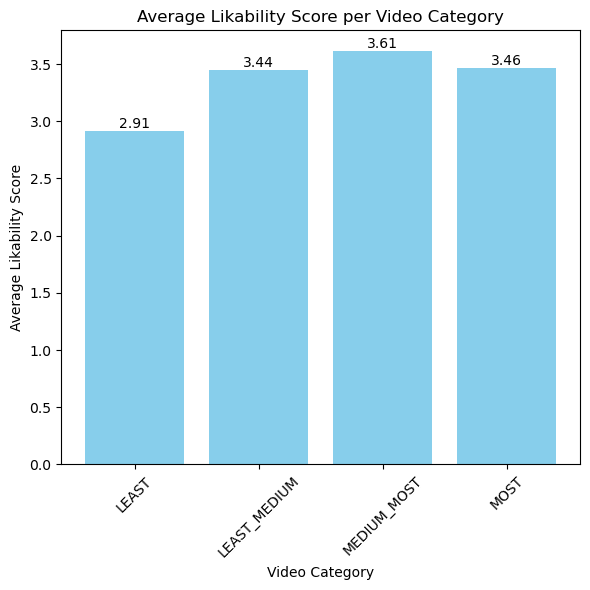

In [24]:
# Calculate the average likability score per video category
average_likability = combined_df.groupby('VideoCategory')['AdLikability'].mean().reset_index()

# Plot the average likability score per video category
plt.figure(figsize=(6, 6))
bars = plt.bar(average_likability['VideoCategory'], average_likability['AdLikability'], color='skyblue')
plt.xlabel('Video Category')
plt.ylabel('Average Likability Score')
plt.title('Average Likability Score per Video Category')
plt.xticks(rotation=45)

# Add the averages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

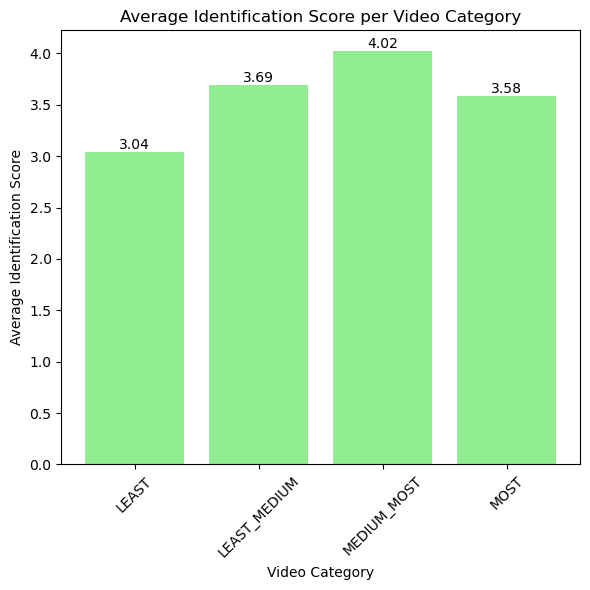

In [25]:
# Calculate the average identification score per video category
combined_df['IdentificationAvg'] = combined_df[['IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']].mean(axis=1)

# Calculate the average identification score per video category
average_identification_score = combined_df.groupby('VideoCategory')['IdentificationAvg'].mean().reset_index()

# Plot the average identification score per video category
plt.figure(figsize=(6, 6))
bars = plt.bar(average_identification_score['VideoCategory'], average_identification_score['IdentificationAvg'], color='lightgreen')
plt.xlabel('Video Category')
plt.ylabel('Average Identification Score')
plt.title('Average Identification Score per Video Category')
plt.xticks(rotation=45)

# Add the averages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [26]:
# Calculate the mean, median, and standard deviation for likability and identification scores
likability_mean = combined_df['AdLikability'].mean()
likability_median = combined_df['AdLikability'].median()
likability_std = combined_df['AdLikability'].std()

identification_mean = combined_df['IdentificationAvg'].mean()
identification_median = combined_df['IdentificationAvg'].median()
identification_std = combined_df['IdentificationAvg'].std()

likability_stats = {
    "Mean": likability_mean,
    "Median": likability_median,
    "Standard Deviation": likability_std
}

identification_stats = {
    "Mean": identification_mean,
    "Median": identification_median,
    "Standard Deviation": identification_std
}
likability_stats, identification_stats

({'Mean': 3.3628048780487805,
  'Median': 4.0,
  'Standard Deviation': 0.9639150220647368},
 {'Mean': 3.5876524390243905,
  'Median': 4.0,
  'Standard Deviation': 1.4617105855874835})

In [27]:
import pandas as pd

# Calculate the mean, median, and standard deviation for likability
likability_stats = {
    "Mean": combined_df['AdLikability'].mean(),
    "Median": combined_df['AdLikability'].median(),
    "Standard Deviation": combined_df['AdLikability'].std()
}

# List of identification questions
identification_questions = ['IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']
identification_stats = {}

# Calculate statistics for each identification question
for question in identification_questions:
    identification_stats[question] = {
        "Mean": combined_df[question].mean(),
        "Median": combined_df[question].median(),
        "Standard Deviation": combined_df[question].std()
    }

# Convert identification_stats to a DataFrame for better visualization
identification_stats_df = pd.DataFrame(identification_stats).transpose()

# Display the statistics
print("Likability Statistics:", likability_stats)
print("\nIdentification Questions Statistics:")
print(identification_stats_df)


Likability Statistics: {'Mean': 3.3628048780487805, 'Median': 4.0, 'Standard Deviation': 0.9639150220647368}

Identification Questions Statistics:
                  Mean  Median  Standard Deviation
IDQuestion_1  3.762195     4.0            1.583025
IDQuestion_2  3.701220     4.0            1.614839
IDQuestion_3  3.557927     4.0            1.661674
IDQuestion_4  3.329268     4.0            1.595520


In [28]:
# Calculate the sample size, mean, and standard deviation for likability and identification scores per video category
table_data = combined_df.groupby('VideoCategory').agg(
    Sample_Size=('AdLikability', 'size'),
    Likability_Mean=('AdLikability', 'mean'),
    Likability_Std=('AdLikability', 'std'),
    IDQ1_Mean=('IDQuestion_1', 'mean'),
    IDQ1_Std=('IDQuestion_1', 'std'),
    IDQ2_Mean=('IDQuestion_2', 'mean'),
    IDQ2_Std=('IDQuestion_2', 'std'),
    IDQ3_Mean=('IDQuestion_3', 'mean'),
    IDQ3_Std=('IDQuestion_3', 'std'),
    IDQ4_Mean=('IDQuestion_4', 'mean'),
    IDQ4_Std=('IDQuestion_4', 'std')
).reset_index()

# Format the table data to match the desired table structure
table_data_formatted = table_data.copy()
table_data_formatted['Likability'] = table_data_formatted.apply(lambda row: f"{row['Likability_Mean']:.1f} ({row['Likability_Std']:.2f})", axis=1)
table_data_formatted['IDQ1'] = table_data_formatted.apply(lambda row: f"{row['IDQ1_Mean']:.1f} ({row['IDQ1_Std']:.2f})", axis=1)
table_data_formatted['IDQ2'] = table_data_formatted.apply(lambda row: f"{row['IDQ2_Mean']:.1f} ({row['IDQ2_Std']:.2f})", axis=1)
table_data_formatted['IDQ3'] = table_data_formatted.apply(lambda row: f"{row['IDQ3_Mean']:.1f} ({row['IDQ3_Std']:.2f})", axis=1)
table_data_formatted['IDQ4'] = table_data_formatted.apply(lambda row: f"{row['IDQ4_Mean']:.1f} ({row['IDQ4_Std']:.2f})", axis=1)

# Select and rename the final columns for the table
final_table = table_data_formatted[['VideoCategory', 'Sample_Size', 'Likability', 'IDQ1', 'IDQ2', 'IDQ3', 'IDQ4']]
final_table.columns = ['Condition', 'Sample Size', 'Ad Likability', 'Identification Q1', 'Identification Q2', 'Identification Q3', 'Identification Q4']


final_table


,Condition,Sample Size,Ad Likability,Identification Q1,Identification Q2,Identification Q3,Identification Q4
0,LEAST,80,2.9 (0.98),3.2 (1.62),3.2 (1.48),2.9 (1.60),2.8 (1.55)
1,LEAST_MEDIUM,81,3.4 (1.07),3.9 (1.63),3.8 (1.64),3.7 (1.68),3.3 (1.55)
2,MEDIUM_MOST,83,3.6 (0.78),4.1 (1.43),4.1 (1.54),4.1 (1.58),3.8 (1.54)
3,MOST,84,3.5 (0.87),3.8 (1.56),3.7 (1.67),3.5 (1.60),3.4 (1.62)


In [29]:
import pandas as pd

# Calculate the average identification score
combined_df['IdentificationAvg'] = combined_df[['IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']].mean(axis=1)

# Calculate the sample size, mean, and standard deviation for likability and the average identification score per video category
table_data_avg = combined_df.groupby('VideoCategory').agg(
    Sample_Size=('AdLikability', 'size'),
    Likability_Mean=('AdLikability', 'mean'),
    Likability_Std=('AdLikability', 'std'),
    IdentificationAvg_Mean=('IdentificationAvg', 'mean'),
    IdentificationAvg_Std=('IdentificationAvg', 'std')
).reset_index()

# Format the table data to match the desired table structure
table_data_avg['Likability'] = table_data_avg.apply(lambda row: f"{row['Likability_Mean']:.1f} ({row['Likability_Std']:.2f})", axis=1)
table_data_avg['IdentificationAvg'] = table_data_avg.apply(lambda row: f"{row['IdentificationAvg_Mean']:.1f} ({row['IdentificationAvg_Std']:.2f})", axis=1)

# Select and rename the final columns for the table
final_table_avg = table_data_avg[['VideoCategory', 'Sample_Size', 'Likability', 'IdentificationAvg']]
final_table_avg.columns = ['Condition', 'Sample Size', 'Ad Likability', 'Identification Avg']

# Display the table
print(final_table_avg)

      Condition  Sample Size Ad Likability Identification Avg
0         LEAST           80    2.9 (0.98)         3.0 (1.41)
1  LEAST_MEDIUM           81    3.4 (1.07)         3.7 (1.46)
2   MEDIUM_MOST           83    3.6 (0.78)         4.0 (1.37)
3          MOST           84    3.5 (0.87)         3.6 (1.46)


In [30]:
import pandas as pd
import pingouin as pg

# Select the identification questions
identification_questions = combined_df[['IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']]

# Calculate Cronbach's alpha using Pingouin
cronbach_alpha = pg.cronbach_alpha(data=identification_questions)

print(f"Cronbach's alpha: {cronbach_alpha[0]:.2f}")
print(f"Confidence Interval: {cronbach_alpha[1]}")

Cronbach's alpha: 0.93
Confidence Interval: [0.913 0.939]


# Perpare for Regression Analysis

In [31]:
import pandas as pd

# Assuming combined_df is your DataFrame
narrativeness_scores = {
    'MOST': 3.888777778,
    'MEDIUM_MOST': 3.055555444,
    'LEAST_MEDIUM': 2.055555556,
    'LEAST': 1
}

# Map the narrativeness scores to the VideoCategory in the DataFrame
combined_df['NarrativenessScore'] = combined_df['VideoCategory'].map(narrativeness_scores)
combined_df['NarrativenessScore'] = pd.to_numeric(combined_df['NarrativenessScore'], errors='coerce')
combined_df['NarrativenessScore']

0      3.888778
1      1.000000
2      2.055556
3      3.888778
4      3.055555
         ...   
323    3.055555
324    3.888778
325    3.888778
326    2.055556
327    3.888778
Name: NarrativenessScore, Length: 328, dtype: float64

In [33]:
# Save the cleaned DataFrame to a new CSV file
combined_df_path = 'combined_df.csv'
combined_df.to_csv(combined_df_path, index=False)

In [34]:
# Load the original cleaned CSV file
file_path = cleaned_file_path
surveys_cleaned = pd.read_csv(file_path)

# Split the data into two CSV files, one for males and one for females
sex_df = surveys_cleaned[surveys_cleaned['Sex'].isin([1, 2])]

# Save the dataframes to CSV files

# Define the columns for video1 and video2
video2_columns = ['Video2 Ad Likability', 'Video2 ID Questions_1', 'Video2 ID Questions_2', 'Video2 ID Questions_3', 'Video2 ID Questions_4', 'Sex']
video1_columns = ['Video1 Ad likability', 'Video1 ID Questions _1', 'Video1 ID Questions _2', 'Video1 ID Questions _3', 'Video1 ID Questions _4', 'Sex']

# Rename columns for concatenation
sex_df_video1 = sex_df[video1_columns + ['Video1']]
sex_df_video2 = sex_df[video2_columns + ['Video2']]

# Standardize column names for concatenation
sex_df_video1.columns = ['AdLikability', 'IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4', 'Sex', 'VideoCategory']
sex_df_video2.columns = ['AdLikability', 'IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4', 'Sex', 'VideoCategory']

# Concatenate video1 and video2 data
combined_sex_df = pd.concat([sex_df_video1, sex_df_video2], ignore_index=True)

# Map the narrativeness scores to the VideoCategory in the DataFrame
combined_sex_df['NarrativenessScore'] = combined_sex_df['VideoCategory'].map(narrativeness_scores)
combined_sex_df['NarrativenessScore'] = pd.to_numeric(combined_sex_df['NarrativenessScore'], errors='coerce')

# Calculate the average identification score
combined_sex_df['IdentificationAvg'] = combined_sex_df[['IDQuestion_1', 'IDQuestion_2', 'IDQuestion_3', 'IDQuestion_4']].mean(axis=1)

# Save the combined dataframes to CSV files
combined_sex_df.to_csv('combined_sex_df.csv', index=False)